## 事前準備

**TensorFlow1.xのセットアップ**
ColabのDefault Versionが2.0になった時の対応用。<font color=red>**ランタイムの再起動が必要!!**</font>

In [ ]:
%tensorflow_version 1.x
import tensorflow as tf
print(tf.__version__)

TensorFlow 1.x selected.
1.15.2


**ドライブ共有準備**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/drive


In [ ]:
import tensorflow as tf     # TensorFlowのインポート
print(tf.__version__)
import keras      # Kerasのインポート
print(keras.__version__)

1.15.2
2.3.1


Using TensorFlow backend.


# **Keras(TensorFlow)でCIFAR-10のデータを使って画像分類モデル(CNN)を作成する例**
*   Kerasはtensorflowなどで動くPythonで書かれたニューラルネットワークライブラリ。詳細は[こちら](https://keras.io/ja/)
*   CIFAR-10は60,000個の画像が入ったデータ・セット。50,000個がトレーニング用，10,000個がテスト用。飛行機/自動車/鳥/猫など10種類の画像。100種類のデータセットのCIFAR-100もある。

## **サンプルデータ準備**

In [ ]:
# 初心者用のディープラーニングツール(dlt)をインストール CIFAR-10等を含む
!pip install dlt

  Created wheel for gast: filename=gast-0.2.2-cp36-none-any.whl size=7540 sha256=91f2b35558125314400daa61794ebf92aa0ec17c56eb6683204ddf54e367eab8
  Stored in directory: /root/.cache/pip/wheels/5c/2e/7e/a1d4d4fcebe6c381f378ce7743a3ced3699feb89bcfbdadadd
Successfully built gast
  Found existing installation: gast 0.3.3
    Uninstalling gast-0.3.3:
      Successfully uninstalled gast-0.3.3


**データの準備(CIFAR-10データセットの読み込み)**

In [ ]:
import dlt      # パッケージインポート
data = dlt.cifar.load_cifar10()      # データをダウンロードしてセット
x_train = data.train_images       # 学習用データのセット
y_train = data.train_labels       # 学習用ラベルのセット
x_test = data.train_images        # テスト用データのセット
y_test =data.train_labels         # テスト用ラベルのセット

170500096/170498071 [==============================] - 11s 0us/step


**読み込んだ画像の概略（サムネイルを表示）**

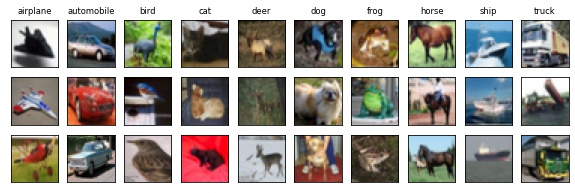

In [ ]:
dlt.utils.plot_examples(data,num_examples=3,fname='examples.jpg')   # 取りあえず3行ほど作成
from IPython.display import Image,display_jpeg
display_jpeg(Image('./examples.jpg'))

**読み込んだ画像(イメージ)の確認**

[1]


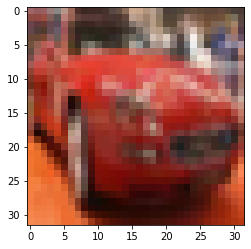

In [ ]:
import matplotlib.pyplot as plt
plt.imshow(x_train[5])  # 画像表示
print(y_train[5])  # ついでにラベル番号も表示

**読み込んだ画像(配列データ)の確認**

In [ ]:
print(x_train[5])      # （データは32×32で、それぞれにRGB値(0-255)が格納されている）

[[[159 102 101]
  [150  91  95]
  [153  95  97]
  ...
  [ 91  71  56]
  [ 74  63  55]
  [ 76  58  55]]

 [[142  75  68]
  [146  72  66]
  [155  76  65]
  ...
  [127 105  71]
  [122 111  93]
  [ 86  69  61]]

 [[109  67  75]
  [ 99  58  60]
  [105  59  52]
  ...
  [137 112  80]
  [163 132 105]
  [ 93  72  71]]

 ...

 [[244 129  70]
  [240 123  65]
  [241 122  65]
  ...
  [156  42  15]
  [179  59  26]
  [200  73  36]]

 [[246 133  74]
  [243 128  72]
  [243 127  70]
  ...
  [162  44  14]
  [178  56  22]
  [192  65  27]]

 [[246 139  82]
  [243 133  78]
  [244 132  77]
  ...
  [166  47  14]
  [173  51  17]
  [182  57  19]]]


**読み込んだ画像(配列データ)の正規化**

<font color=red>特徴量のスケールを揃えるため、データを正規化する。</font>（0-255のRGB値を255で割り算して、0-1の値に正規化する）

In [ ]:
x_train = x_train.astype('float32') / 255    # 学習用の画像データ
x_test = x_test.astype('float32') / 255    #テスト用の画像データ
print(x_train[5])      # 一応、確認

[[[0.62352943 0.4        0.39607844]
  [0.5882353  0.35686275 0.37254903]
  [0.6        0.37254903 0.38039216]
  ...
  [0.35686275 0.2784314  0.21960784]
  [0.2901961  0.24705882 0.21568628]
  [0.29803923 0.22745098 0.21568628]]

 [[0.5568628  0.29411766 0.26666668]
  [0.57254905 0.28235295 0.25882354]
  [0.60784316 0.29803923 0.25490198]
  ...
  [0.49803922 0.4117647  0.2784314 ]
  [0.47843137 0.43529412 0.3647059 ]
  [0.3372549  0.27058825 0.23921569]]

 [[0.42745098 0.2627451  0.29411766]
  [0.3882353  0.22745098 0.23529412]
  [0.4117647  0.23137255 0.20392157]
  ...
  [0.5372549  0.4392157  0.3137255 ]
  [0.6392157  0.5176471  0.4117647 ]
  [0.3647059  0.28235295 0.2784314 ]]

 ...

 [[0.95686275 0.5058824  0.27450982]
  [0.9411765  0.48235294 0.25490198]
  [0.94509804 0.47843137 0.25490198]
  ...
  [0.6117647  0.16470589 0.05882353]
  [0.7019608  0.23137255 0.10196079]
  [0.78431374 0.28627452 0.14117648]]

 [[0.9647059  0.52156866 0.2901961 ]
  [0.9529412  0.5019608  0.28235295]


**分類ラベルのデータ変換** \\
機械学習に適用させるため、ラベルデータをone-hotベクトルに変換（取りあえず作法と考えていただいてOKです） \\
例)ラベルは番号で格納されている(carは1、frogは6とか。これをone-hot表現(以下のようなもの)に変換する \\
>"1"　→　[0,1,0,0,0,0,0,0,0,0] \\
>”6”　→　[0,0,0,0,0,0,1,0,0,0]　　※0,1,2,3,4,5,6の順なので7個めに1がたつ


In [ ]:
from keras.utils.np_utils import to_categorical  # Kerasのto_categorical()を使って変換
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)
print(y_train[0])

[0. 0. 0. 0. 0. 0. 1. 0. 0. 0.]




---



## **学習モデルの構築**

**モデルを構築**

In [ ]:
from keras.models import Sequential    # ライブラリのインポート
from keras.layers import Dense, Dropout, Activation, Conv2D, MaxPooling2D, Flatten
from keras.optimizers import Adam

model = Sequential()    # インスタンス作成（Sequentialモデル。シンプルで一般的なモデル）

# CNNの1層目レイヤー
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu' , padding='same', input_shape=(32,32,3)))    # 畳み込みの入力層
model.add(Conv2D(32, kernel_size=(3, 3), activation='relu'))  # 畳み込み層を追加
model.add(MaxPooling2D(pool_size=(2, 2)))  # MaxPooling層を追加
model.add(Dropout(0.25))  # ドロップアウト層を追加（過学習の防止）

# 2層目
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu' , padding='same'))
model.add(Conv2D(64, kernel_size=(3, 3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

# 出力層
model.add(Flatten())     # 入力を平準化
model.add(Dense(512))    # 全結合層を追加
model.add(Activation('relu'))
model.add(Dropout(0.5))  # ドロップアウト層を追加（過学習の防止）
model.add(Dense(10))     # 出力層を追加
model.add(Activation('softmax'))

**モデルを学習**

※CPUだとエポック10で30分ちょいかかる。。。ちなみにGPUだと2分かからなかった。

In [ ]:
model.compile(loss='categorical_crossentropy', 
              optimizer=Adam(lr=0.001), 
              metrics=['accuracy'])
fit = model.fit(x_train, y_train,    # 訓練用入力データ
              batch_size=128,        # バッチサイズ(同時計算するサンプル数)
              epochs=10,             # エポック(学習のサイクル数) 10->2
              verbose=1,             # 結果の出力
              validation_split=0.1   # ホールドアウト検証として使うデータの割合
                )


Train on 45000 samples, validate on 5000 samples
Epoch 1/10
45000/45000 [==============================] - 17s 373us/step - loss: 1.7189 - accuracy: 0.3699 - val_loss: 1.4098 - val_accuracy: 0.4964
Epoch 2/10
45000/45000 [==============================] - 10s 228us/step - loss: 1.3161 - accuracy: 0.5297 - val_loss: 1.1018 - val_accuracy: 0.6148
Epoch 3/10
45000/45000 [==============================] - 10s 231us/step - loss: 1.1379 - accuracy: 0.5960 - val_loss: 0.9856 - val_accuracy: 0.6530
Epoch 4/10
45000/45000 [==============================] - 10s 228us/step - loss: 1.0292 - accuracy: 0.6366 - val_loss: 0.9166 - val_accuracy: 0.6852
Epoch 5/10
45000/45000 [==============================] - 10s 228us/step - loss: 0.9372 - accuracy: 0.6711 - val_loss: 0.8098 - val_accuracy: 0.7224
Epoch 6/10
45000/45000 [==============================] - 10s 230us/step - loss: 0.8546 - accuracy: 0.6989 - val_loss: 0.7665 - val_accuracy: 0.7350
Epoch 7/10
45000/45000 [==============================] 

**作成したモデルを保存**

In [ ]:
model.save('MyNet_cifar10.h5')

＜参考＞モデルの可視化

In [ ]:
from IPython.display import SVG
from keras.utils.vis_utils import model_to_dot
SVG(model_to_dot(model).create(prog='dot', format='svg'))     # モデルの可視化

**作成したモデルの精度を確認**

In [ ]:
score = model.evaluate(x_test, y_test,verbose=0)     # 損失値の計算
#print('Test score:', score[0])       # 損失値(1-損失値)
print('正解率（accuracy）:', score[1])    # 正確さ

正解率（accuracy）: 0.8420799970626831


In [ ]:
# 学習経過をプロット
import matplotlib.pyplot as plt 
plt.figure(figsize=(10,5),dpi=100)
plt.plot(range(1, 11), fit.history['acc'], label="training")         # epocに応じて変更range 11 
plt.plot(range(1, 11), fit.history['val_acc'], label="validation")   # epocに応じて変更range 11
plt.xlabel('Epochs') 
plt.ylabel('Accuracy') 
plt.legend() 
plt.grid(True)
plt.show()

KeyError: ignored

<Figure size 1000x500 with 0 Axes>

### **推論（作成した学習モデルでテスト）**

予めGoogleドライブに保存してある画像で推論実施（事前マウント必要）。

In [ ]:
#---認識テスト画像の確認表示----
import numpy as np
from PIL import Image
img_width = 256 ; img_height = 256
file_path = '/content/drive/My Drive/otr_dog2.jpg'  # 読み込むファイルを指定(google drive)
img = Image.open(file_path).convert('RGB') # Gray->L, RGB->RGB
img = img.resize((img_width, img_height))
x = np.array(img, dtype=np.float32)
x = x / 255
plt.imshow(x)
plt.show()

#---テスト画像の変換----
from keras.preprocessing.image import img_to_array, load_img
img = img_to_array(load_img(file_path, target_size=(32,32)))  # 読み込み
img_nad = img_to_array(img)/255   # 0-1に変換
img_nad = img_nad[None, ...]  # Kerasで使用する場合、最初にサンプル数のついた4次元配列に変換する(例： 1,224,224,3)

#---読み込んだテスト画像で推論-----
model.load_weights('MyNet_cifar10.h5')
pred = model.predict(img_nad, batch_size=1, verbose=0)
pred_score = np.max(pred)
pred_label = np.argmax(pred)
print('--------------------------------------')
print('予測スコア:', pred_score * 100 , '%')       # 
print('予測ラベル:', pred_label)    # 
print('**ラベルの凡例表示**')
print('0:airplane(飛行機)  ,  1:automobile(自動車)  ,  2:bird(鳥)  ,  3:cat(猫)  ,  4:deer(鹿)  ,  ')
print('5:dog(犬)  ,  6:frog(カエル)  ,  7:horse(馬)  ,  8:ship(船)  ,  9:truck(トラック)')

In [ ]:
#---認識テスト画像の確認表示----
import numpy as np
from PIL import Image
img_width = 256 ; img_height = 256
file_path = '/content/drive/My Drive/fune1.jpg'  # 読み込むファイルを指定(google drive)
img = Image.open(file_path).convert('RGB') # Gray->L, RGB->RGB
img = img.resize((img_width, img_height))
x = np.array(img, dtype=np.float32)
x = x / 255
plt.imshow(x)
plt.show()

#---テスト画像の変換----
from keras.preprocessing.image import img_to_array, load_img
img = img_to_array(load_img(file_path, target_size=(32,32)))  # 読み込み
img_nad = img_to_array(img)/255   # 0-1に変換
img_nad = img_nad[None, ...]  #4次元配列に変換

#---読み込んだテスト画像で推論-----
model.load_weights('MyNet_cifar10.h5')
pred = model.predict(img_nad, batch_size=1, verbose=0)
pred_score = np.max(pred)
pred_label = np.argmax(pred)
print('--------------------------------------')
print('予測スコア:', pred_score * 100 , '%')       # 
print('予測ラベル:', pred_label)    # 
print('**ラベルの凡例表示**')
print('0:airplane(飛行機)  ,  1:automobile(自動車)  ,  2:bird(鳥)  ,  3:cat(猫)  ,  4:deer(鹿)  ,  ')
print('5:dog(犬)  ,  6:frog(カエル)  ,  7:horse(馬)  ,  8:ship(船)  ,  9:truck(トラック)')

In [ ]:
#---認識テスト画像の確認表示----
import numpy as np
from PIL import Image
img_width = 256 ; img_height = 256
file_path = '/content/drive/My Drive/hikouki1.jpg'  # 読み込むファイルを指定(google drive)
img = Image.open(file_path).convert('RGB') # Gray->L, RGB->RGB
img = img.resize((img_width, img_height))
x = np.array(img, dtype=np.float32)
x = x / 255
plt.imshow(x)
plt.show()

#---テスト画像の変換----
from keras.preprocessing.image import img_to_array, load_img
img = img_to_array(load_img(file_path, target_size=(32,32)))  # 読み込み
img_nad = img_to_array(img)/255   # 0-1に変換
img_nad = img_nad[None, ...]  #4次元配列に変換

#---読み込んだテスト画像で推論-----
model.load_weights('MyNet_cifar10.h5')
pred = model.predict(img_nad, batch_size=1, verbose=0)
pred_score = np.max(pred)
pred_label = np.argmax(pred)
print('--------------------------------------')
print('予測スコア:', pred_score * 100 , '%')       # 
print('予測ラベル:', pred_label)    # 
print('**ラベルの凡例表示**')
print('0:airplane(飛行機)  ,  1:automobile(自動車)  ,  2:bird(鳥)  ,  3:cat(猫)  ,  4:deer(鹿)  ,  ')
print('5:dog(犬)  ,  6:frog(カエル)  ,  7:horse(馬)  ,  8:ship(船)  ,  9:truck(トラック)')

### （その他）メモ書きなど

In [ ]:
!whoami